In [9]:
import pandas 
import numpy 
import io 
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt

#---------------------------------------STEP1------------------------------------------

#Read the Data file and put header=None
dataset=pandas.read_csv('wdbc.dataset', header=None)

#Process into a pandas dataframe
df=pandas.DataFrame(dataset)

#---------------------------------------STEP2------------------------------------------

#Map M to 0 and B to 1
headers = []
headers.append("Id")
headers.append("Result")
for i in range(0,30):
    headers.append("Feature")
df.columns = headers
del df["Id"]
# print(df)
df=df.replace(to_replace="M",value=int("1"))
df=df.replace(to_replace="B",value=int("0"))
#---------------------------------------STEP3------------------------------------------

#Split the dataset into training, validation and test sets
k=int(0.8*len(df))
l=int(0.1*len(df))+1

#Split the dataset: 100-->80:20 and then 20-->10:10
dft=df.iloc[:k,:]

#100-->80:20. 80%-->training
trainingSet=df.iloc[:k,:]
# print("Size of training set: ",len(trainingSet))

#20-->10:10. 10%-->validation
validationSet=df.iloc[k:k+l,:]
# print("Size of validation set: ",len(validationSet))

#10%-->test
testSet=df.iloc[k+l:,:]
# print("Size of test set: ",len(testSet))

#----------------------------------------STEP4------------------------------------------

#Normalizing the datasets to a same range [0,1] using the scikit-preprocessing library
scaler=preprocessing.MinMaxScaler()
xTrain=scaler.fit_transform(trainingSet.iloc[:,1:])
xValidation=scaler.fit_transform(validationSet.iloc[:,1:])
xTest=scaler.fit_transform(testSet.iloc[:,1:])
yTrain=numpy.array(trainingSet.iloc[:,:1])
yValidation=validationSet.iloc[:,:1]
yValidation = numpy.array(yValidation)
yTest=numpy.array(testSet.iloc[:,:1])

#----------------------------------------STEP5------------------------------------------

#Initialize weights, biases and learning rate
learningRate= 1


#Taking weights=1
weights= numpy.transpose(numpy.ones((1,xTrain.shape[1])))
bias=0
b1=0
#Sigmoid Function to convert the resulting values to [0,1] range
def sigmoid(k):
    s=1/(1+numpy.exp(-k))
    return s

#Evaluation function-->Defined here to use it for predicting training accuracy in step 6
def test(m,t):
    tp=0
    tn=0
    fp=0
    fn=0
    k=numpy.dot(m, weights)
    j=1/(1+numpy.exp(-k))
    for x in range(len(j)):
        if j[x]>=0.5:
            j[x]= 1
        else:
            j[x]=0
        if j[x] == t[x] :
            if j[x]==1 and t[x]==1:
                tp=tp+1
            elif j[x]==0 and t[x]==0:
                tn=tn+1
        elif j[x]==0 and t[x]==1:
            fn=fn+1
        else:
            fp=fp+1
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Precision=tp/(tp+fp)
    Recall=tp/(tp+fn)
    p=[Accuracy,Precision,Recall]
    return p


#----------------------------------------STEP6------------------------------------------

#Arrays for plots
trainingLoss=[]
TA=[]
validationLoss=[]
VA=[]

#m=Number of samples of Training Set
m=trainingSet.shape[0]

#m1=Number of samples of Validation Set
m1=validationSet.shape[0]

#Number of Epochs=10000
for x in range(10000):
    z=numpy.matmul(xTrain,weights)+bias
    a=sigmoid(z)
    changeWeight=(-1/m)*numpy.dot(numpy.transpose(xTrain),(yTrain-a))
    changeBias=(-1/m)*(yTrain-a)
    weights=weights-(learningRate*changeWeight)
    bias=bias-(learningRate*changeBias)
    z1=numpy.matmul(xValidation,weights)+b1
    a1=sigmoid(z1)
    changeBias1=(-1/m1)*(yValidation-a1)
    b1=b1-(learningRate*changeBias1)
    trainingLossFn=(-1/m)*(numpy.dot(yTrain.T,(numpy.log(a)))+numpy.dot((1-yTrain).T,(numpy.log(1-a))))
    validationLossFn=(-1/m1)*numpy.sum((numpy.dot(yValidation.T,(numpy.log(a1))),numpy.dot((1-yValidation).T,(numpy.log(1-a1)))))
    trainingLoss.append(numpy.squeeze(trainingLossFn))
    validationLoss.append(numpy.squeeze(validationLossFn))
    TA.append(numpy.squeeze(test(xTrain, yTrain))[0])
    VA.append(numpy.squeeze(test(xValidation, yValidation))[0])


#------------------------------------------Functions for Plots----------------------------------------------    

#Function to plot the Loss Function: Training Loss and Validation Loss vs Number of Epochs
def lossPlot():
    tLoss,=plt.plot(trainingLoss,"r--")
    vLoss,=plt.plot(validationLoss,"b--")
    r=plt.legend([tLoss,vLoss],["Training Loss","Validation Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Graph")

#Function to plot Accuracy: Training Accuracy and Validation Accuracy vs Number of Epochs
def accuracyPlot():
    trainingAccuracy,=plt.plot(TA,"r--")
    validationAccuracy,=plt.plot(VA,"b--")
    q=plt.legend([trainingAccuracy,validationAccuracy],["Training Accuracy","Validation Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Graph")
    plt.show()
    


In [10]:
#--------------------------------------Results------------------------------------------
t=test(xTest,yTest)
print("Test Set: \nAccuracy: "+str(t[0])+"\nPrecision: "+str(t[1])+"\nRecall: "+str(t[2]))


# Uncomment and run the 4 lines below to get the training and validation set parameters
# tr=test(xTrain,yTrain)
# vs=test(xValidation,yValidation)
# print("Training Set: \nAccuracy: "+str(tr[0])+"\nPrecision: "+str(tr[1])+"\nRecall: "+str(tr[2]))
# print("Validation Set: \nAccuracy: "+str(vs[0])+"\nPrecision: "+str(vs[1])+"\nRecall: "+str(vs[2]))

Test Set: 
Accuracy: 0.9649122807017544
Precision: 0.9285714285714286
Recall: 0.9285714285714286


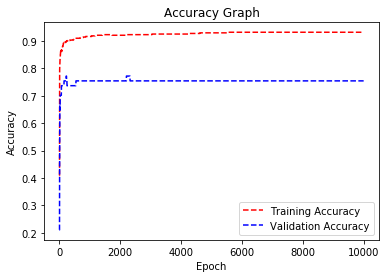

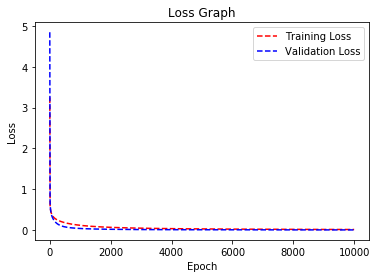

In [11]:
#--------------------------------------Plots-----------------------------------------------
accuracyPlot()
lossPlot()
